<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine2/blob/main/WOMAC_Total_Regression_Version300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
!pip install smogn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
import numpy as np
import pandas as pd
import smogn
#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.29_Final_W-tempo-spatial.csv")
d=pd.read_csv("/content/drive/MyDrive/Iqram Sir/KOA_EMG_WOMAC__2022.08.31_Final_Original.csv")

dataset = smogn.smoter(
    
    data = d, 
    y = "WOMAC_total"
)

r_index: 100%|##########| 2/2 [00:00<00:00,  2.78it/s]


In [122]:
dataset.head(10)

,Patient ID,Data Type,Bone-Attribution,WOMAC_Pain,WOMAC_Pain Grade,WOMAC_Stiffness,WOMAC_Stiffness Grade,WOMAC_Physical function,WOMAC_MHhysical function Grade,WOMAC_total,...,TA-G-100,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,13476,Testing,O,12,Moderate,1,Mild,51,Severe,66,...,89.210916,23.561325,196.265830,17.436673,116.903674,81.212575,117.632699,5.427912,0.419859,5.634610
1,14065,Testing,O,10,Moderate,5,Mild,50,Severe,66,...,49.205587,29.574802,301.782222,28.686978,65.821729,339.732180,80.054641,2.378970,1.117509,2.919105
2,14070,Testing,O,10,Moderate,5,Mild,49,Severe,66,...,34.046660,136.360236,159.450491,124.096180,89.443297,73.729069,117.815612,0.642349,0.469803,0.938452
3,14460,Testing,O,14,Moderate,6,Mild,46,Severe,67,...,92.005612,97.660101,72.326753,82.521853,108.871977,51.896792,170.684060,1.074751,0.730803,1.959742
4,14434,Testing,O,14,Moderate,5,Mild,46,Severe,66,...,874.570224,247.268182,73.322511,476.343149,322.744013,15.655485,806.204187,1.344885,0.211047,1.712968
5,13223,Testing,O,9,Moderate,6,Mild,52,Severe,67,...,102.594183,95.610604,140.521732,98.148518,223.106702,27.090542,224.304204,2.346705,0.194970,2.220455
6,13354,Testing,O,13,Moderate,5,Mild,49,Severe,69,...,105.155790,128.398233,133.866191,127.898354,112.568389,114.243761,128.884996,0.881549,0.826023,0.985922
7,13335,Testing,O,14,Moderate,5,Mild,50,Severe,69,...,52.163785,288.367937,107.397289,133.362220,155.225902,75.269456,185.640022,0.489706,0.706321,1.363491
8,13514,Testing,O,14,Moderate,5,Mild,49,Severe,70,...,194.820035,79.686897,64.197688,156.518791,109.426548,25.530061,329.483931,1.363452,0.363388,2.035797
9,14121,Testing,O,12,Moderate,6,Mild,52,Severe,69,...,254.702335,224.384478,101.776780,253.487229,278.680698,36.729474,405.213558,1.260988,0.346807,1.634251


In [123]:
dataset.shape

(151, 812)

In [124]:
X = dataset.iloc[:,17:]
y = dataset.iloc[:, 9]

In [125]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

In [126]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)

Features [21 22 23 24] are constant.
invalid value encountered in true_divide


In [127]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [128]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [129]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 20


In [130]:
imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

              Specs      Score
776         TA-G-91  14.250359
777         TA-G-92  14.238526
778         TA-G-93  13.708989
779         TA-G-94  12.917056
775         TA-G-90  12.573823
784         TA-G-99  12.540083
785        TA-G-100  12.484301
780         TA-G-95  10.660406
783         TA-G-98  10.574886
774         TA-G-89  10.244043
782         TA-G-97   9.338231
781         TA-G-96   9.070033
773         TA-G-88   8.298053
772         TA-G-87   6.886925
791  Swing_CCI_TA-G   6.678506
685          TA-G-0   6.522743
686          TA-G-1   6.092682
771         TA-G-86   5.265386
687          TA-G-2   5.231436
495        TA-RF-12   4.537289


In [131]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [132]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 9]

In [133]:
X_train=X_new.iloc[:120,:]  
X_test=X_new.iloc[120:,:]
y_train=y_new.iloc[:120]
y_test=y_new.iloc[120:]

In [134]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


#Taining Ploting and Result

In [135]:
y_pred_train = lin_reg.predict(X_train)

print(y_pred.shape)
from sklearn.metrics import r2_score,mean_squared_error
print("Training r2: ",r2_score(y_train,y_pred_train))


r_sq = lin_reg.score(X_new, y_new)
print("Training r_sq: ",r_sq)





(31,)
Training r2:  0.318944859970674
Training r_sq:  0.01932795302431478


In [136]:
r_sq_train = lin_reg.score(X_train, y_pred_train)
print(r_sq_train)

1.0


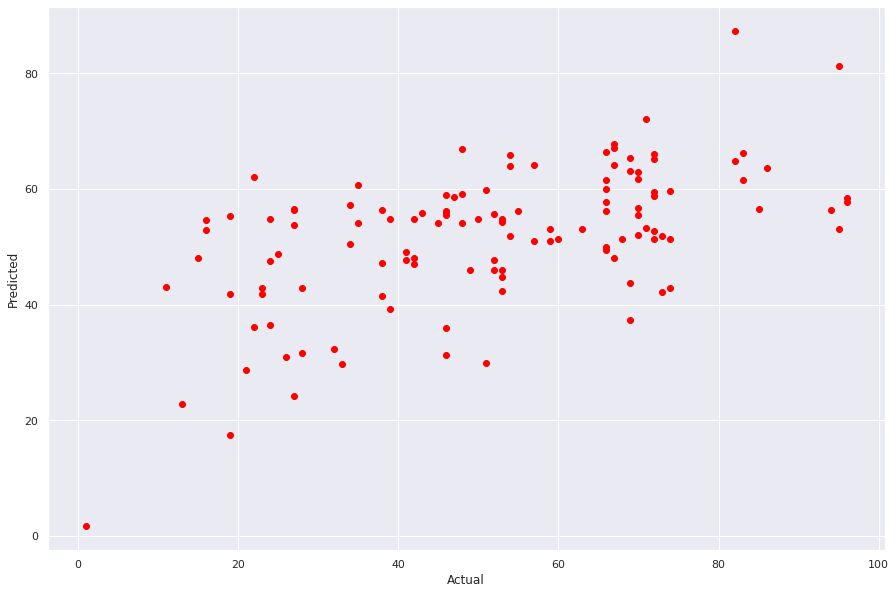

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred_train, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [138]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_train,
        "Predicted Value":y_pred_train,
        "Difference":y_train-y_pred_train
    }
)

pred_y_df

,Actual Value,Predicted Value,Difference
0,66,50.023669,15.976331
1,66,60.078211,5.921789
2,66,57.684072,8.315928
3,67,67.739122,-0.739122
4,66,66.319060,-0.319060
...,...,...,...
135,46,55.443131,-9.443131
138,51,29.878954,21.121046
139,52,47.796477,4.203523
142,57,64.228574,-7.228574


In [139]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred_train))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred_train))



Mean squared error: 313.22
Coefficient of determination: 0.32


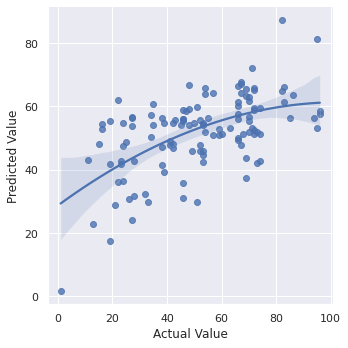

In [140]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)



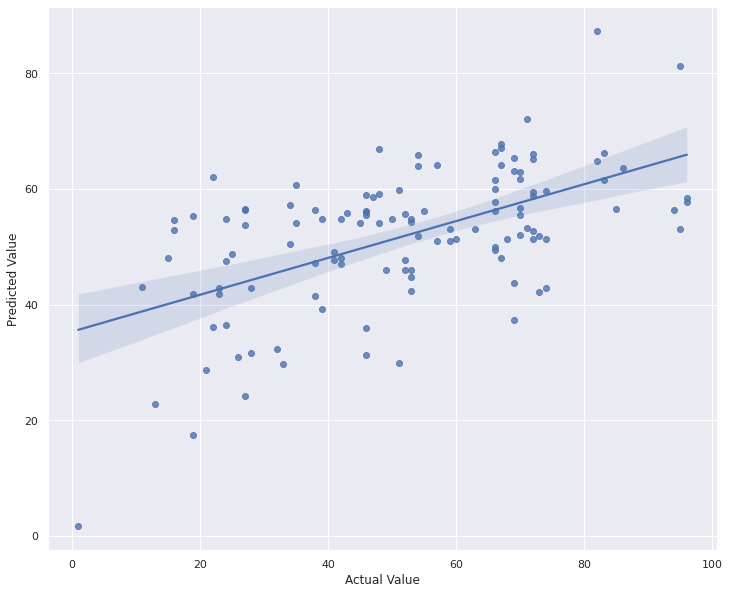

In [141]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);




#Testing Ploting and Result

In [142]:
y_pred_test = lin_reg.predict(X_test)


from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_test,y_pred_test))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  -1.6816376805186817
R_sq:  0.01932795302431478


In [143]:
r_sq_test = lin_reg.score(X_test, y_pred_test)
print(r_sq_test)

1.0


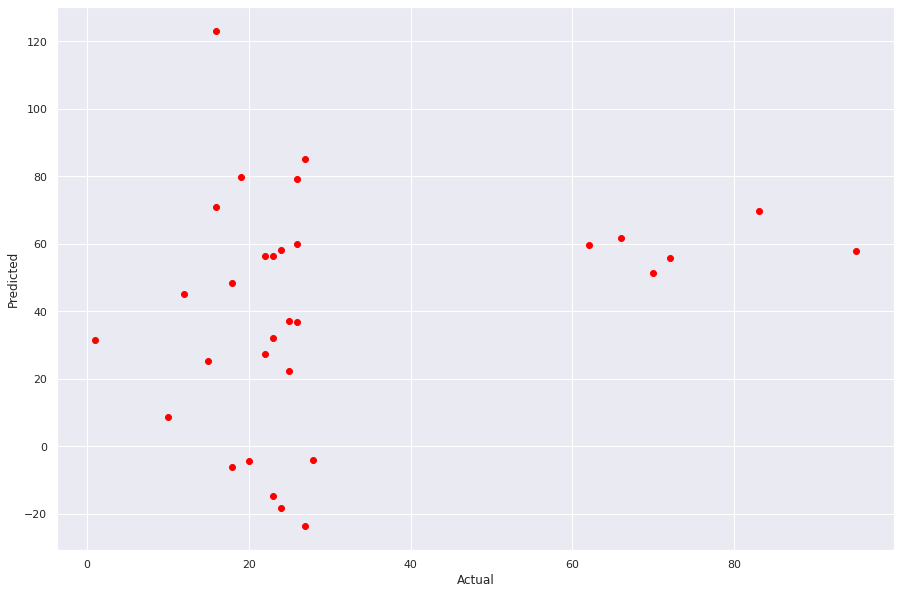

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [145]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_test,
        "Predicted Value":y_pred_test,
        "Difference":y_test-y_pred_test
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
144,62,59.505857,2.494143
145,66,61.767083,4.232917
146,70,51.392147,18.607853
147,72,55.774595,16.225405
148,83,69.810201,13.189799
149,95,57.846749,37.153251
0,1,31.528965,-30.528965
1,10,8.704847,1.295153
2,12,45.138945,-33.138945
3,15,25.364907,-10.364907


In [146]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))


Mean squared error: 1370.12
Coefficient of determination: -1.68


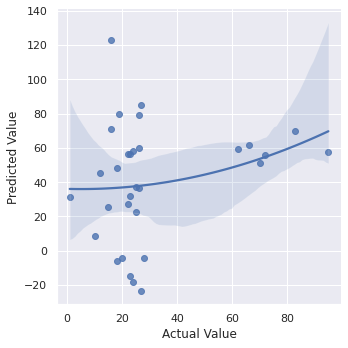

In [147]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)

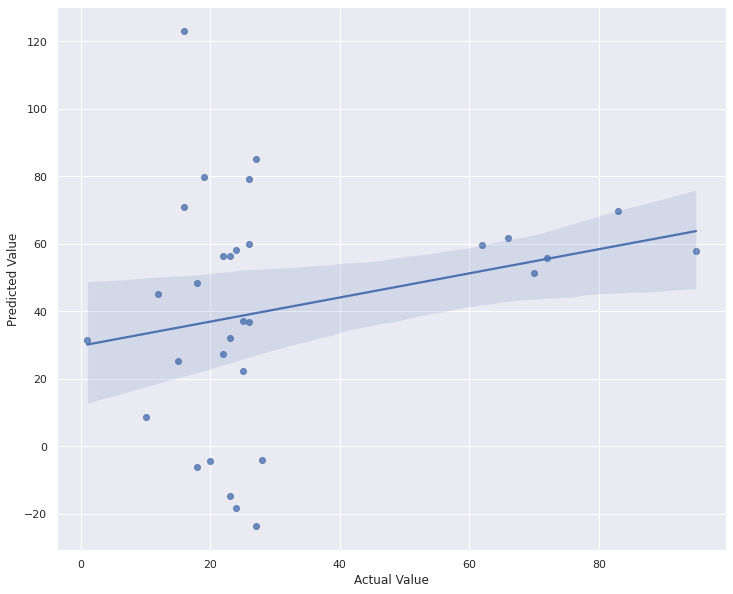

In [148]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);

#Over All dataset Ploting and Results

In [149]:
y_pred_new = lin_reg.predict(X_new)


from sklearn.metrics import r2_score,mean_squared_error
print("Testing r2: ",r2_score(y_new,y_pred_new))

r_sq = lin_reg.score(X_new, y_new)
print("R_sq: ",r_sq)

Testing r2:  0.01932795302431478
R_sq:  0.01932795302431478


In [150]:
r_sq_test = lin_reg.score(X_new, y_pred_new)
print(r_sq_test)

1.0


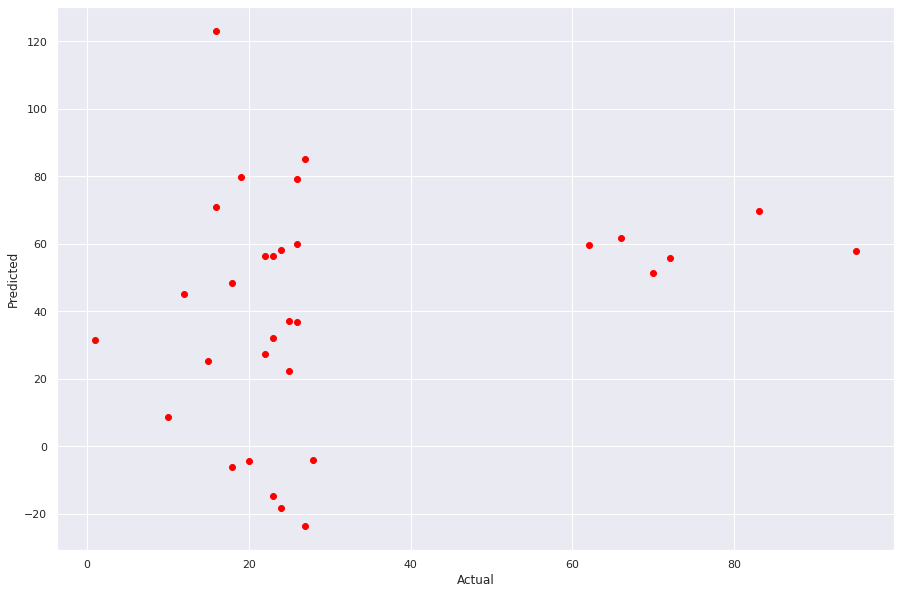

In [151]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [152]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_new,
        "Predicted Value":y_pred_new,
        "Difference":y_new-y_pred_new
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
0,66,50.023669,15.976331
1,66,60.078211,5.921789
2,66,57.684072,8.315928
3,67,67.739122,-0.739122
4,66,66.319060,-0.319060
...,...,...,...
20,26,79.120866,-53.120866
21,27,85.002502,-58.002502
22,26,36.735502,-10.735502
23,28,-4.017873,32.017873


In [153]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_new, y_pred_new))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_new, y_pred_new))


Mean squared error: 530.20
Coefficient of determination: 0.02


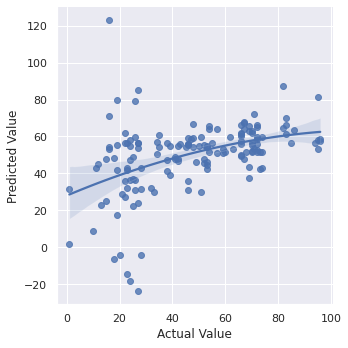

In [154]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)

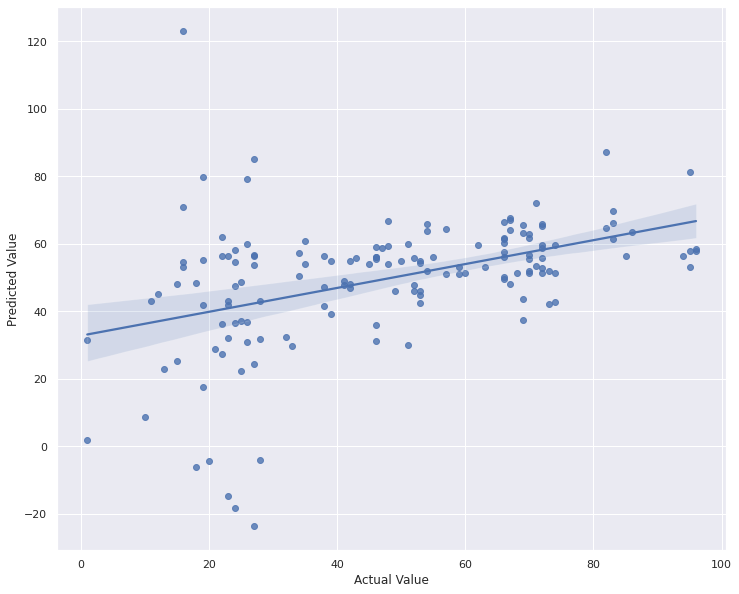

In [155]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);

#Support Vector Regression (SVR) using linear and non-linear kernels

**SHAP**

In [156]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


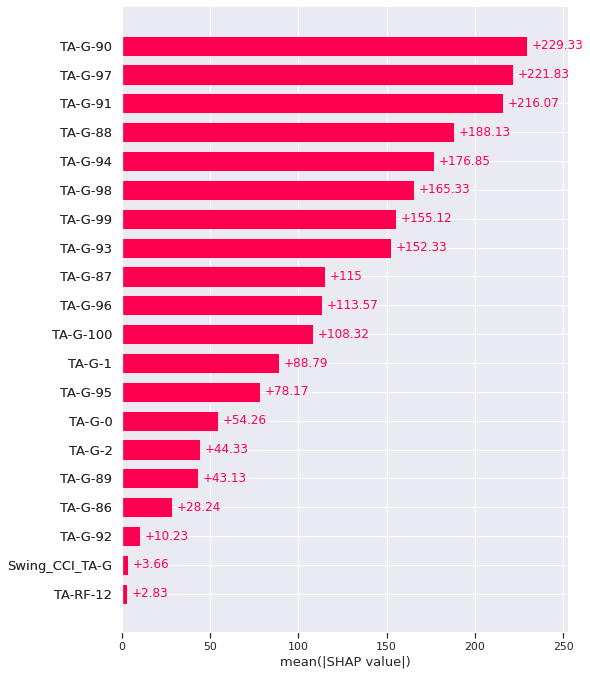

In [157]:
import pandas as pd
import shap
import sklearn
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer (X_train)
shap.plots.bar(shap_values,max_display=20)